In [1]:
import pandas as pd, GPy, seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
%run load_data.py micro

loading microarray data
micro_all_genes: (13613, 105)
micro_effector_genes: (1044, 105)
micro_mod_activities: (89, 105)
micro_mod_genevalues: (201, 105)
micro_mod_nodevalues: (462, 105)
micro_signaling_genes: (2184, 105)
micro_design: (105, 4)


In [3]:
Y = micro_mod_genevalues.T.copy()
Y -= Y.values.mean()
Y = Y.dropna(axis=1).values

In [4]:
m = GPy.models.BayesianGPLVM(Y, 6, num_inducing=40)

In [5]:
m.likelihood.fix(0.1)
m.X.variance.fix(0.1)
m.optimize(messages=1, max_iters=300)

In [6]:
m.X.variance.unfix()
m.optimize(messages=1, max_iters=600)

In [7]:
m.likelihood.unfix()
m.optimize(messages=1, max_iters=3e5)

 /Users/maxz/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


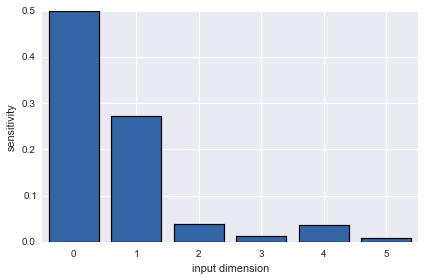

In [8]:
m.kern.plot_ARD()

 /Users/maxz/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning:elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


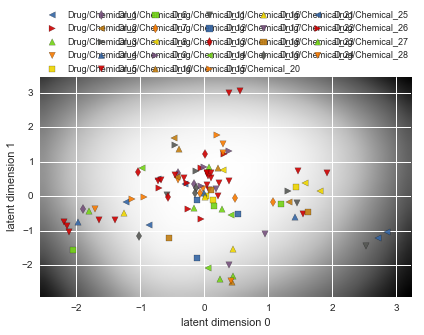

In [10]:
m.plot_magnification(labels=micro_design.Effect)

In [ ]:
micro_design